## Tarea 10
### Lineal Regression

Load data

In [1]:
# Import library and read data with pandas 
import pandas as pd
CO2Data = pd.read_csv("../data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

make a scatter plot with lineal regresion line

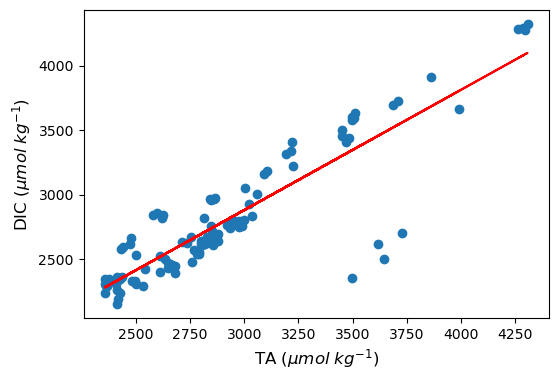

Slope: 0.9329743239047239


In [12]:
import matplotlib.pyplot as plt
from scipy import stats

#define variables
x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)


Print main results

In [3]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.7784247010713163
p_value: 8.179416835112142e-36
slope: 0.9329743239047239
intercept: 80.30614134209736


### Least Squares Regression (OSL)

In [4]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           8.18e-36
Time:                        19:04:09   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             80.3061    144.021      0.

Add statistic description and interpretation

In [5]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.778
✔️ Good model fit: Explains most of the variance.

Coefficients:
- const: Coef = 80.3061, p = 0.5783 → ⚠️ Not significant (p ≥ 0.05)
- ta_micromol_kg: Coef = 0.9330, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (ta_micromol_kg): 0.9330, p = 0.0000 → ✔️ Significant

Standard Error of the model: 236.4180


## Exercise 
### Linear regression of salinity vs temperature and DIC vs Salinity

In [7]:
CO2Data.head(10)

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0
5,CDL03F,5/3/2020,Candelaria,River,CDL03,Bottom,Dry,22.49,39453.4,1.867,...,0.12,24.01,37919.1,108.11,27.118,18.63163,-91.29297,2752,2849,2849.0
6,CDL04S,5/3/2020,Candelaria,Plume,CDL04,Surface,Dry,0.98,51682.3,0.474,...,6.85,32.46,49690.8,3.34,27.098,18.67964,-91.34973,2672,2828,2828.0
7,CDL04F,5/3/2020,Candelaria,Plume,CDL04,Bottom,Dry,4.83,51790.8,2.779,...,6.33,32.93,50319.5,14.24,26.531,18.67966,-91.34956,2613,2818,2818.0
8,CDL05S,5/3/2020,Candelaria,Plume,CDL05,Surface,Dry,1.62,51497.0,0.442,...,6.71,32.62,49892.1,6.10,26.684,18.70429,-91.36858,2652,2828,2828.0
9,CDL05F,5/3/2020,Candelaria,Plume,CDL05,Bottom,Dry,14.20,50724.7,3.373,...,6.04,32.65,49905.6,283.23,25.859,18.70432,-91.36842,2668,2840,2840.0


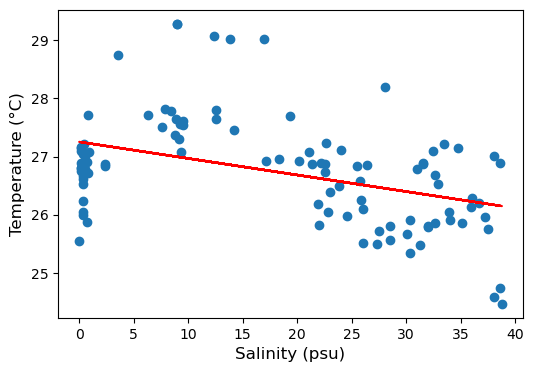

Slope: -0.028458717486946172


In [13]:
#define variables
x = CO2Data['sal_psu']
y = CO2Data['temp_c']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('Salinity (psu)', fontsize = 12, )
plt.ylabel('Temperature (°C)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'SAL_TEMP_Lregr.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [9]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684758
p_value: 6.879907520531129e-06
slope: -0.028458717486946172
intercept: 27.25200067150795


## OSL of salinity vs temperature

In [10]:
# Define the independent and dependent variables
x = CO2Data['sal_psu']
y = CO2Data['temp_c']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 temp_c   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:              jue., 28 ago. 2025   Prob (F-statistic):           6.88e-06
Time:                        19:11:37   Log-Likelihood:                -130.39
No. Observations:                 106   AIC:                             264.8
Df Residuals:                     104   BIC:                             270.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2520      0.132    206.412      0.0

With interpretation

In [11]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.177
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 27.2520, p = 0.0000 → ✔️ Significant (p < 0.05)
- sal_psu: Coef = -0.0285, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (sal_psu): -0.0285, p = 0.0000 → ✔️ Significant

Standard Error of the model: 0.8359


Not a strong model of lineal regression

## Lineal regression of DIC vs Salinity

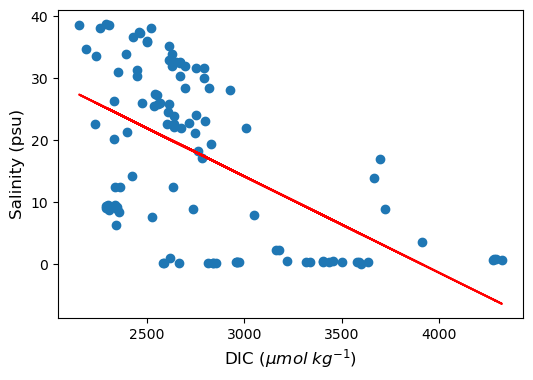

Slope: -0.01553705705851827


In [14]:
#define variables
x = CO2Data['dic_micromol_kg']
y = CO2Data['sal_psu']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('Salinity (psu)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_SAL_Lregr.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [15]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.3271047331022779
p_value: 1.5144104023764912e-10
slope: -0.01553705705851827
intercept: 60.804373629789616


Slope negative, relatively weak R value

## OSL of DIC vs Salinity

In [16]:
# Define the independent and dependent variables
x = CO2Data['dic_micromol_kg']
y = CO2Data['sal_psu']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                sal_psu   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:              jue., 28 ago. 2025   Prob (F-statistic):           1.51e-10
Time:                        19:19:28   Log-Likelihood:                -405.41
No. Observations:                 106   AIC:                             814.8
Df Residuals:                     104   BIC:                             820.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.8044      6.210     

In [17]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.327
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 60.8044, p = 0.0000 → ✔️ Significant (p < 0.05)
- dic_micromol_kg: Coef = -0.0155, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (dic_micromol_kg): -0.0155, p = 0.0000 → ✔️ Significant

Standard Error of the model: 11.1923


Weak lineal regression model